# Regression Demo: Polynomial Regression

The purpose of this demo is to demonstrate the ease and utility of performing polynomial regression, of which linear regression is by far the most common subtype. In this example, we will generate noisy data using a known distribution. We will then treat this data as if it was recorded from an experiment. We will try various methods of fitting the data, and plotting those fits on an appropriate scatter plot for comparison. Then, using each model, we will try to predict on a separate set of test data, and observe the quality of fit using a number of metrics.

Perform the following steps:
1. Create a function that generates a number according to the following equation
    - 1y = sin(x) + 0.1 * normal(0,1).
2. Generate two samples with x randomly chosen between 0 and 3:
    - A training set of 10 (x,y) pairs
    - A test set of 100 (x,y) pairs
3. Fit the following polynomials to the training set
    - Degree 1 polynomial (a line)
    - Degree 2 polynomial (a quadratic)
    - Degree 9 polynomial
4. Create a plot showing the original data as a scatter plot and the three polynomial fits with a legend indicating the degree of the polynomial. Also overlay the sin(x) function with a dotted line.
5. Apply each of the 3 models to predict the y value from the x value in the test set. Find the root mean square error (using a function, no need to code it yourself) between the predictions and the true values. (The expectation is that the degree 2 polynomial should give the best prediction with degree 9 a close second)


## 1. Create a function that generates a number according to the following equation: y = sin(x) + 0.1 * normal(0,1).

In [2]:
# Create a function.
f <- function(x) {
  y = sin(x) + 0.1 * rnorm(1,0,1)
  return(y)
}

y <- f(3)

A function in R has two components: name and body. Use the name to call the function. This will execute the function. The body is surrounded by {}.This portion tells the function what processes/actions to perform and what output to return. 

The function has two portions: sin(x) and 0.1*rnorm(1,0,1). Sin(x) is our standard curve that we have chosen. 0.1*rnorm(1,0,1) provides “noise” so that we have a more complex graph to work with. 


## 2. Generate two samples with x randomly chosen between 0 and 3:
A training set of 10 (x,y) pairs

A test set of 100 (x,y) pairs

In [3]:
f <- function(x) {
  y = sin(x) + 0.1 * rnorm(length(x),0,1)
  return(y)
}

We'll use runif(), which generates random numbers from a uniform distribution. Here, we generate 10 numbers between 0 and 3.

In [4]:
x <- runif(10, min = 0, max = 3)
y <- f(x)

In [5]:
trainingset <- data.frame(x,y)
trainingset

x,y
1.0142446,0.7999672
2.8519612,0.2429195
2.6954684,0.6011303
1.2735254,0.9761758
2.8761472,0.4453814
1.4791413,1.0111414
0.5395585,0.4087432
1.3799015,1.0739012
1.2545659,0.9263472
2.0311936,0.6047156


In [6]:
x <- runif(100, min = 0, max = 3)
y <- f(x)

In [7]:
testset <- data.frame(x,y)
head(testset)

x,y
0.4483651,0.3891188
1.7377212,1.0240023
2.2765278,0.6281788
2.7892662,0.4546566
0.3565906,0.1927493
0.2360618,0.1388700


Notice how we changed our function. The first argument now takes in length(x). This generates a new “noise” for each point. Before, we only created one “noise”. We do not want to add the same random noise to each point. So, we make sure that a unique “noise” is created for each point, and since the number of points corresponds to the length() of our vector, we use length(x).


## 3. Fit the following polynomials to the training set
Degree 1 polynomial (a line), Degree 2 polynomial (a quadratic), Degree 9 polynomial


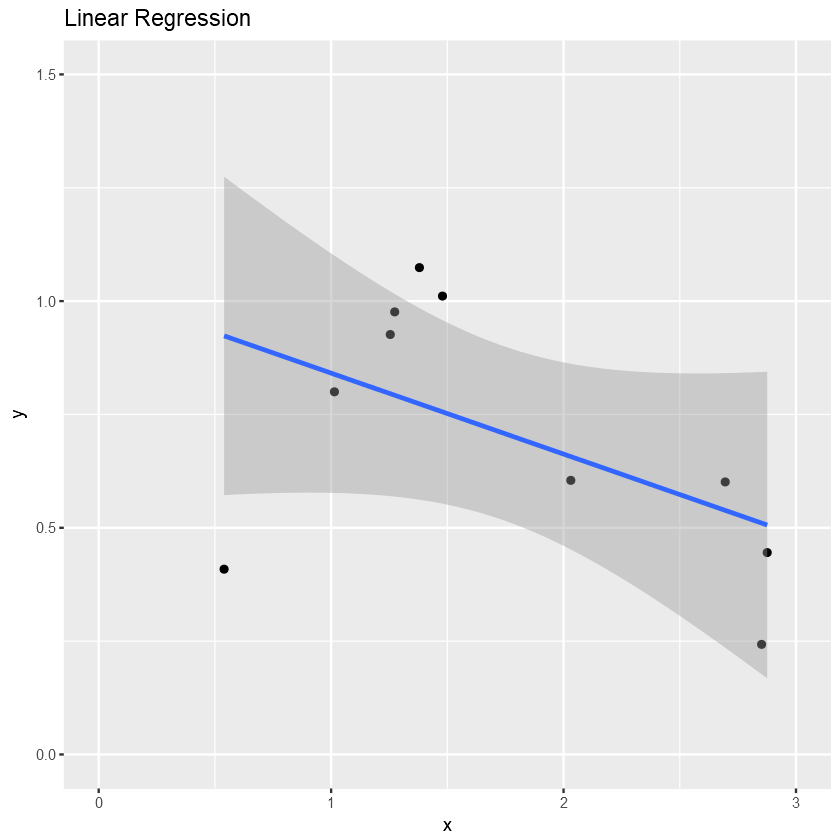

In [8]:
library(ggplot2)
mytraininggraphlinear <- lm(y~x, trainingset)
ggplot(trainingset, aes(x=x, y=y)) + 
  geom_point() + 
  xlim(0,3) + 
  coord_cartesian(ylim=c(0,1.5)) + 
  geom_smooth(method = "lm") + 
  ggtitle("Linear Regression")


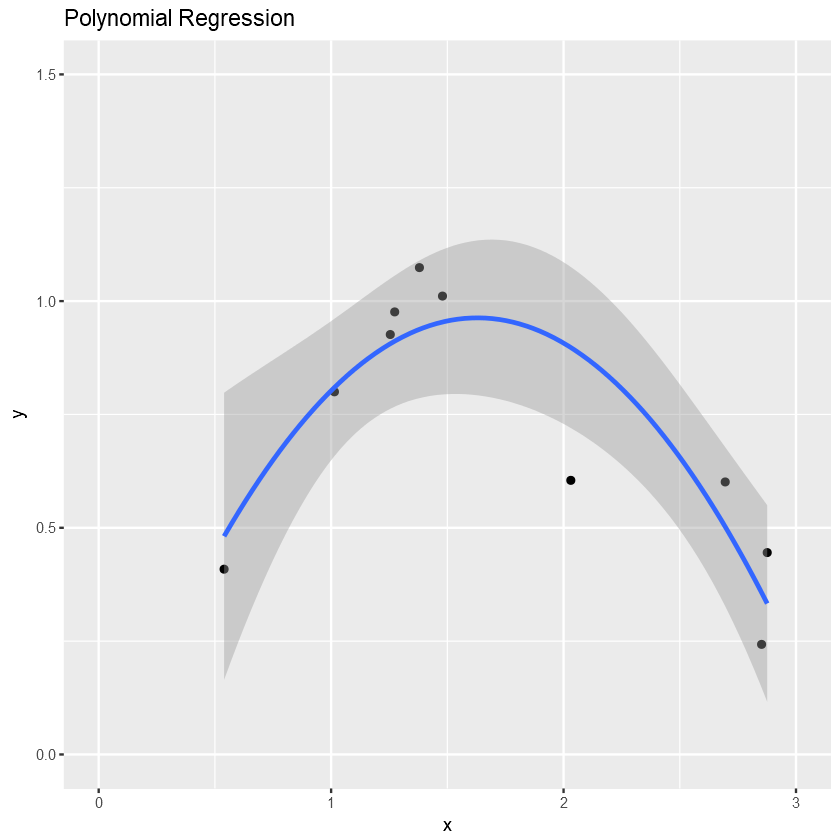

In [9]:
mytraininggraphpolynomial <- lm(y~x+x^2, trainingset)
ggplot(trainingset, aes(x=x, y=y)) + 
  xlim(0,3) + 
  coord_cartesian(ylim=c(0,1.5)) +
  geom_point() + 
  geom_smooth(method = "lm", formula = y~poly(x,2) ) + 
  ggtitle("Polynomial Regression")

Warning message in qt((1 - level)/2, df):
"NaNs produced"

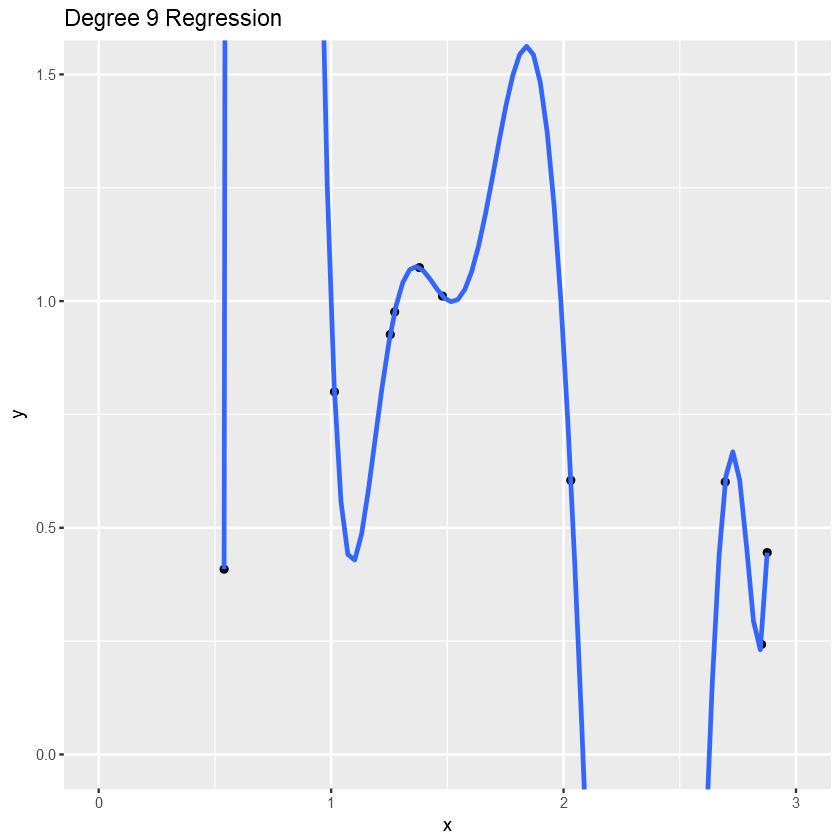

In [10]:
mytraininggraphdeg9 <- lm(y~x+x^9, trainingset)
ggplot(trainingset, aes(x=x, y=y)) + 
  xlim(0,3) + 
  geom_point() +
  coord_cartesian(ylim=c(0,1.5)) +
  geom_smooth(method="lm", formula = y~poly(x,9)) + ggtitle("Degree 9 Regression")

## 4. Create a plot showing the original data as a scatter plot and the three polynomial fits with a legend indicating the degree of the polynomial. Also overlay the sin(x) function with a dotted line.


Warning message in qt((1 - level)/2, df):
"NaNs produced"

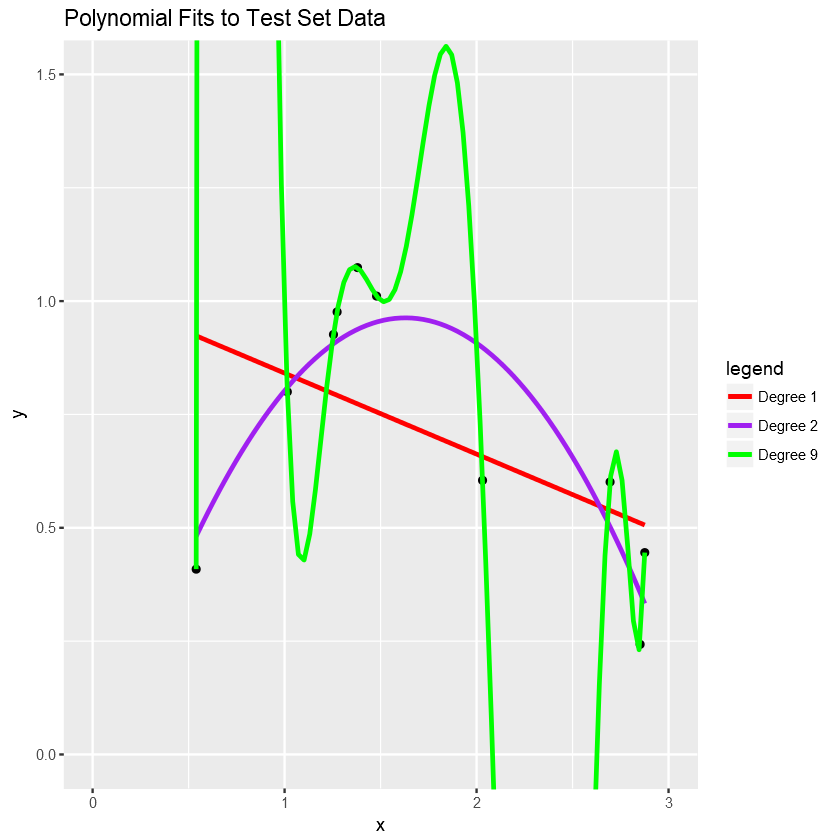

In [11]:
summaryplot <- ggplot(data = trainingset, aes(x,y)) + 
  geom_point() +
  geom_smooth(method = "lm", aes(color = "Degree 1"), fill = NA) +
  geom_smooth(method = "lm", formula = y~poly(x,2), aes(color = "Degree 2"), fill = NA) +
  geom_smooth(method = "lm", formula = y~poly(x,9), aes(color = "Degree 9"), fill = NA) +
  ggtitle("Polynomial Fits to Test Set Data") +
  scale_colour_manual(name="legend", values=c("red", "purple", "green")) + 
  coord_cartesian(ylim=c(0,1.5)) + 
  xlim(0,3)

summaryplot 

##  5. Apply each of the 3 models to predict the y value from the x value in the test set. Find the root mean square error (using a function, no need to code it yourself) between the predictions and the true values. (The expectation is that the degree 2 polynomial should give the best prediction with degree 9 a close second)


In [12]:
model1 <- lm(y~poly(x,1), trainingset)
pred1 <- predict(model1, testset)
print("This is the root mean square error for the linear model: ")
sqrt(mean((pred1-testset$y)^2))

[1] "This is the root mean square error for the linear model: "


[1] 0.3894313

In [13]:
model2 <- lm(y~poly(x,2), trainingset)
pred2 <- predict(model2, testset)
print("This is the root mean square error for the degree 2 model: ")
sqrt(mean((pred2-testset$y)^2))

[1] "This is the root mean square error for the degree 2 model: "


[1] 0.1054543

In [14]:
model3 <- lm(y~poly(x,9), trainingset)
pred3 <- predict(model3, testset)
print("This is the root mean square error for the degree 9 model: ")
sqrt(mean((pred3-testset$y)^2))

[1] "This is the root mean square error for the degree 9 model: "


[1] 795.5169